In [107]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [108]:
#reading the csv document
salaires_df = pd.read_csv("ds_salaries.csv")
display(salaires_df)

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,MI,CT,ML Engineer,30000,fully remote,S
1,MI,CT,ML Engineer,25500,fully remote,S
2,SE,FT,Applied Scientist,222200,hybrid,L
3,SE,FT,Applied Scientist,136000,hybrid,L
4,SE,FT,Data Scientist,147100,hybrid,M
...,...,...,...,...,...,...
1560,SE,FT,Machine Learning Engineer,134500,hybrid,L
1561,MI,FT,Data Scientist,130000,hybrid,M
1562,MI,FT,Data Scientist,90000,hybrid,M
1563,EN,FT,Data Engineer,160000,hybrid,M


35% moyenne de personne travaillant a la maison. même chose pour notre type de travail ("analyse de donnée")
est ce que notre doc est representatif de ceux qui travaillent que a la maison (est ce que 35% des gens dans ce csv sont 100 a la maison ?) ou alors pas representatif. 

on doit verifier a partir de remote_ratio. si j'ai fully remote c'est que le mec travail que a la maison. 

1a) 
- H0 - This file really represent the population of people working from home.
- H1 - This file isn't a good representation of people working from home.  

1b)
####The test statistic is . 

1c) We are going to check the null hypothesys with a bootstrap method. 

In [191]:
def calculate_mean(sample, column_name, value_name):
    '''This function return the mean value for a specific column, which contain non-numerical values, in a sample
    samle: df containing the sample
    column_name: the name of the column we want to calculate the mean
    value_name: the value whose average we want'''
    count = sample[column_name].value_counts();
    mean = count[value_name]/sample.shape[0];
    return mean 
    
    
def bootstrap_mean(original_sample, column_name, num_replications, categorical = None):
    '''This function returns an array of bootstrapped sample means:
    original_sample: df containing the original sample
    column_name: name of column containing the variable of interest
    num_replications: number of bootstrap samples to draw
    categorical : The categorical name whose average we want'''  
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_var_of_interest = original_sample[[column_name]] # the use of [[]] will return a df rather than series
    bstrap_means = np.empty(num_replications) # collection array for our estimates
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(n=original_sample_size, replace=True) # note WITH REPLACEMENT!
        if(categorical is not None) :
            resampled_mean = calculate_mean(bootstrap_sample, column_name, categorical)
        else : 
            resampled_mean = bootstrap_sample.mean()
        bstrap_means[i] = resampled_mean
    
    return bstrap_means

# run the bootstrap procedure and calculate the mean of fully_remote people in our original sample
means_bootstrapped = bootstrap_mean(salaires_df, 'remote_ratio', 5000, "fully remote")
population_mean = calculate_mean(salaires_df, "remote_ratio", "fully remote")


1d) Our conclusion is that we can reject the H0 under the conditions (with a condidence iterval of 95%)

The 95% boostsrap confidence interval is [0.3022364217252396, 0.34760383386581467]
The test statical is 0.35 isn't in the confidence interval


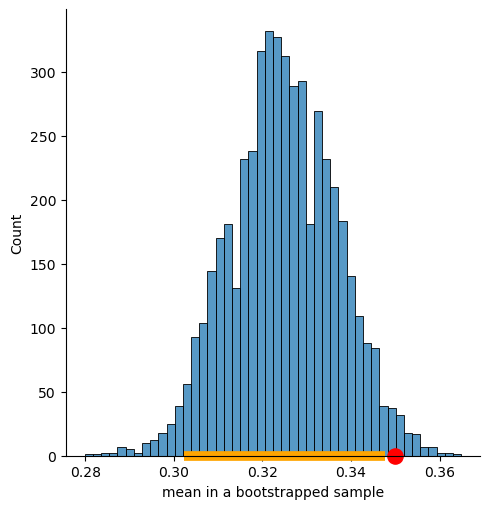

In [193]:
# visualize results
print('The 95% boostsrap confidence interval is', [left_end,right_end])
print("The test statical is 0.35 isn't in the confidence interval")

left_end = np.percentile(means_bootstrapped, 2.5, method='higher')
right_end =  np.percentile(means_bootstrapped, 97.5, method='higher')
ax1 = sns.displot(means_bootstrapped)
ax1.set(xlabel='mean in a bootstrapped sample')
plt.scatter(0.35, 0, color='red', s=120, clip_on=False) # the true value of the parameter (unknowable)
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False)  # show line of values between 2.5 and 97.5 percentiles


2a)
  - 𝐻0 - The mean salary of a dataScientist is equal to the mean mean salary of a dataEngineer
  - 𝐻1 - The mean salary of a dataScientist is not equal to the mean mean salary of a dataEngineer

2b)##### The static test 

2c) We are going to check the null hypothesys with a bootstrap method.

In [194]:
#creat a df with the two categoricals that we want
dataScientist_dataEngineer_df = salaires_df[(salaires_df['job_title'] == 'Data Scientist') | (salaires_df['job_title'] == 'Data Engineer')]
#calculate the mean for each one
mean_salary = dataScientist_dataEngineer_df.groupby('job_title')['salary_in_usd'].mean().reset_index()


In [195]:
def diff_of_avgs(df, column_name, grouping_var):
    '''This function returns the difference in averages
    df: the original df
    column_name: the name of the column that we are going to calculate the mean on
    grouping_var: the name of the column that we use to groupby'''
    grpby_var = df.groupby(grouping_var)
    avgs = grpby_var[column_name].mean()
    return avgs[1] - avgs[0]

def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped differences between two sample averages:
      original_sample: df containing the original sample
      column_name: name of column containing the variable to average
      grouping_var: name of variable according to which to group
      num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

# run the bootstrap procedure
bstrap_diffs = bootstrap_mean_difference(dataScientist_dataEngineer_df, 'salary_in_usd', 'job_title',  5000)

2d) 
 - The 95% boostsrap confidence interval for difference between population means is [5216.429760186904, 20289.565691578173]
 - The 99% boostsrap confidence interval for difference between population means [2708.3755672560073, 22431.525984626904]


The 95% boostsrap confidence interval for difference between population means [5216.429760186904, 20289.565691578173]


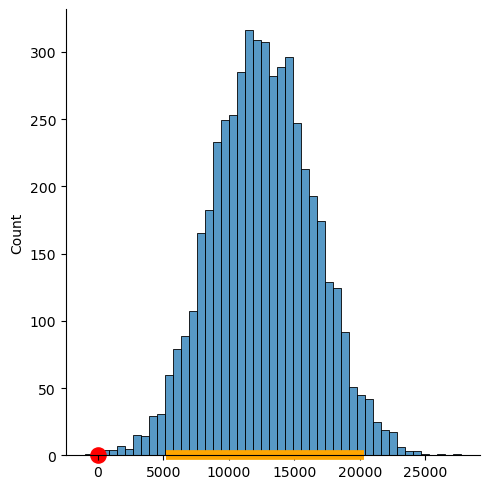

In [196]:
# Get the endpoints of the 95% confidence interval
left_end = np.percentile(bstrap_diffs, 2.5, method='higher')
right_end = np.percentile(bstrap_diffs, 97.5, method='higher')
print('The 95% boostsrap confidence interval for difference between population means', [left_end,right_end])

# visualize results
ax = sns.displot(bstrap_diffs)
plt.scatter(0, 0, color='red', s=120, clip_on=False)
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False);  # show line of values between 2.5 and 97.5 percentiles

The 99% boostsrap confidence interval for difference between population means [2708.3755672560073, 22431.525984626904]


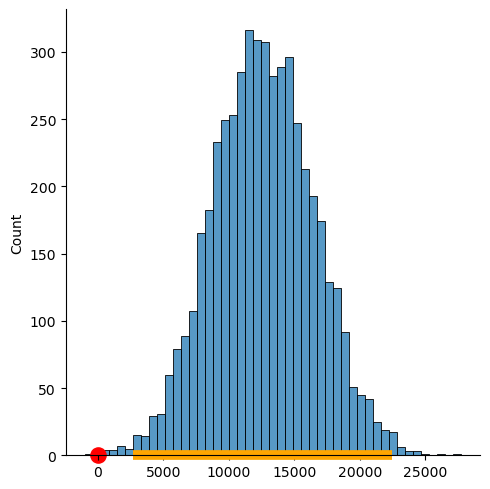

In [197]:
# Get the endpoints of the 99% confidence interval
left_end = np.percentile(bstrap_diffs, 0.5, method='higher')
right_end = np.percentile(bstrap_diffs, 99.5, method='higher')
print('The 99% boostsrap confidence interval for difference between population means', [left_end,right_end])

# visualize results
ax = sns.displot(bstrap_diffs)
plt.scatter(0, 0, color='red', s=120, clip_on=False)
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False);  # show line of values between 2.5 and 97.5 percentiles

2e) We counclude that we can reject the H0 in the different cases, because the expected value (0) isn't in the confidence interval no matter if it's 95% or 99%. In other word we can reject the fact that the salary's means are equals. 

3 ) The confidence interval of the mean salary of an employee in a company of size Medium is [153711.8287808128, 159382.3131245836]

In [125]:
#run the bootstrap procedure on a dataframe with exclusively medium company 
sizeM_society_df = salaires_df[(salaires_df['company_size'] == 'M')]
means_bootstrapped_Msociety = bootstrap_mean(sizeM_society_df, 'salary_in_usd', 5000, False)

The 95% boostsrap confidence interval is [153711.8287808128, 159382.3131245836]


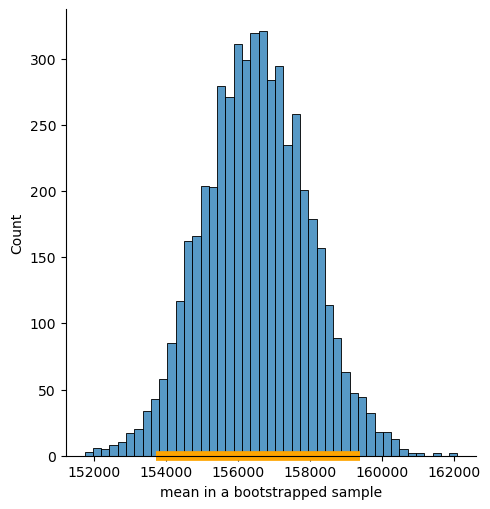

In [198]:
# Get the endpoints of the 95% confidence interval
left_end = np.percentile(means_bootstrapped_Msociety, 2.5, method='higher')
right_end =  np.percentile(means_bootstrapped_Msociety, 97.5, method='higher')
print('The 95% boostsrap confidence interval is', [left_end,right_end])

# visualize results
ax1 = sns.displot(means_bootstrapped_Msociety)
ax1.set(xlabel='mean in a bootstrapped sample')
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False)  # show line of values between 2.5 and 97.5 percentiles


4a) For the 100's 95% bootstrap confidence intervals that we generate, the real median salary was included in 97 of them. 

In [199]:
#calculate the median salary 
#create a df with exclusively hybrid's remote ratio 
real_median_salary = salaires_df["salary_in_usd"].median()
hybrid_df = salaires_df[(salaires_df['remote_ratio'] == 'hybrid')]


In [157]:
def create_sample(hybrid_df, number_people): 
    '''This function is create a sample of a certain size from a df
    hybrid_df: a df that we use to get a sample
    number_people: the size of the sample'''
    return hybrid_df.sample(n=number_people, replace=False)

def bootstrap_median(original_sample, column_name, num_replications):
    '''This function returns an array of bootstrapped sample medians:
    original_sample: df containing the original sample
    column_name: name of column containing the variable of interest
    num_replications: number of bootstrap samples to draw '''  
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_var_of_interest = original_sample[[column_name]] # the use of [[]] will return a df rather than series
    bstrap_medians = np.empty(num_replications) # collection array for our estimates
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(n=original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_median = bootstrap_sample.quantile(0.5, interpolation='higher')
        bstrap_medians[i] = resampled_median
    
    return bstrap_medians
 
def real_median_in_confience_interval(bstrap_medians, real_median_salary) :
    '''This funciton return a bolean value, True if the median is in the confidence interval
    bstrap_median: an array of values from which we calculate the confidence interval
    real_median_salary: the number that we check if in the confidence interval'''
    left_end = np.percentile(bstrap_medians, 2.5, method='higher')
    right_end =  np.percentile(bstrap_medians, 97.5, method='higher')
    flag = False
    if (left_end < real_median_salary) & (real_median_salary < right_end):
        flag = True
    return flag

In [162]:
#running the process 100 times
median_in_confience_interval = np.empty(100)
for i in range(100):
    sample = create_sample(hybrid_df, 150)
    bstrap_median = bootstrap_median(sample, "salary_in_usd",1000)
    median_in_confience_interval[i] = real_median_in_confience_interval(bstrap_median, real_median_salary)

In [200]:
#checking the number of time with a True answer 
count_true = sum(median_in_confience_interval)
print("Number of time that the real median floped in the confidence interval is :", count_true)

Number of time that the real median floped in the confidence interval is : 97.0


4b)

4c)

112000.0


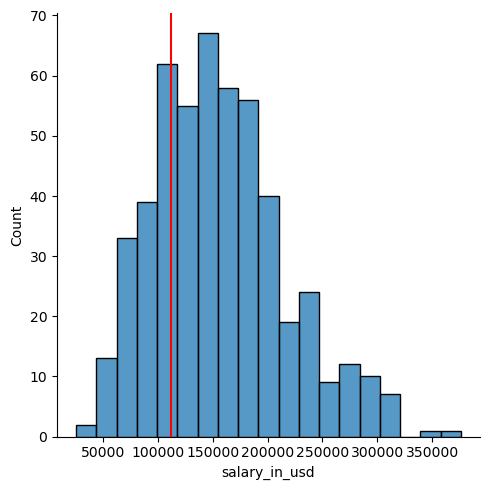

In [186]:
fully_remote_df = salaires_df[(salaires_df['remote_ratio'] == 'fully remote')]
first_quartile_fully = fully_remote_df['salary_in_usd'].quantile(0.25)
print(first_quartile_fully)
ax1 = sns.displot(data=fully_remote_df, x='salary_in_usd')
plt.axvline(x=first_quartile_fully, color='red')
plt.show()

120000.0


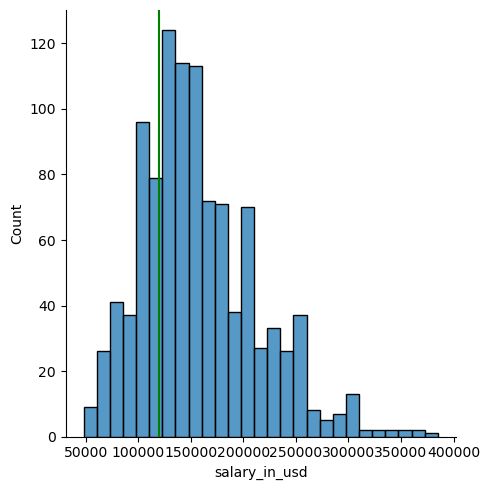

In [187]:
first_quartile_hybrid = hybrid_df['salary_in_usd'].quantile(0.25)
print(first_quartile_hybrid)
ax2 = sns.displot(data=hybrid_df, x='salary_in_usd')
plt.axvline(x=first_quartile_hybrid, color='green')
plt.show()

Part 2 :

1 ) 
With a very small sample, there may be increased bias in bootstrap estimates and higher variability in results. Due to the limited sample size, the generated bootstrap samples may not fully capture the true variability of the data, which may result in biased estimates or less precise confidence intervals.

2a) 